In [1]:
import sys
from loguru import logger
import pandas as pd

from src.balance import Balance
from src.cashflow import CashFlow
from src.simulation import Simulation
from src.variables import ENTITIES, ASSETS_LIAIBILITIES

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
logger.remove()
logger.add(sys.stderr, 
           format='|{level: <1}|  <level>{message}</level>',
           level="DEBUG")

1

In [4]:

# CASHFLOW
cashflow = CashFlow()
for entity in ENTITIES+ASSETS_LIAIBILITIES:
    cashflow.add_entity(entity)
    
# BALANCE
balance = Balance()
for entity in ASSETS_LIAIBILITIES:
    balance.add_entity(entity)
    
simulation = Simulation(start_date='2023-11-01', 
                        duration=12*10, # 10 years
                        cashflow=cashflow, 
                        balance=balance)
simulation.run()

|DEBUG|  Cashflow for: 2023-11-01
|DEBUG|  Salary 1        : $8,027
|DEBUG|  Salary 2        : $6,020
|DEBUG|  Rent            : $-1,406
|DEBUG|  Amenities       : $-602
|DEBUG|  Transport       : $-504
|DEBUG|  Entertainment   : $-652
|DEBUG|  travelling      : $-1,003
|DEBUG|  Food            : $-803
|DEBUG|  Other           : $-501
|DEBUG|  Bank Account    : $0
|DEBUG|  House           : $0
|DEBUG|  Triplex         : $0
|INFO|  Total cashflow: $8,576 


|DEBUG|  Calculate Net Worth for 2023-11-01
|DEBUG|  Bank Account    : $661,826
|DEBUG|  House           : $0
|DEBUG|  Triplex         : $0
|INFO|  Total net worth: $ 661,826 


|DEBUG|  Cashflow for: 2023-12-01
|DEBUG|  Salary 1        : $8,053
|DEBUG|  Salary 2        : $6,040
|DEBUG|  Rent            : $-1,412
|DEBUG|  Amenities       : $-604
|DEBUG|  Transport       : $-508
|DEBUG|  Entertainment   : $-654
|DEBUG|  travelling      : $-1,007
|DEBUG|  Food            : $-805
|DEBUG|  Other           : $-502
|DEBUG|  Bank Account   

|DEBUG|  Triplex         : $-229,857
|INFO|  Total cashflow: $-221,255 


|DEBUG|  Calculate Net Worth for 2023-12-01
|DEBUG|  Bank Account    : $440,571
|DEBUG|  House           : $0
|DEBUG|  Triplex         : $200,000
|INFO|  Total net worth: $ 640,571 


|DEBUG|  Cashflow for: 2024-01-01
|DEBUG|  Salary 1        : $8,080
|DEBUG|  Salary 2        : $6,060
|DEBUG|  Rent            : $-1,418
|DEBUG|  Amenities       : $-606
|DEBUG|  Transport       : $-513
|DEBUG|  Entertainment   : $-657
|DEBUG|  travelling      : $-1,010
|DEBUG|  Food            : $-808
|DEBUG|  Other           : $-503
|DEBUG|  Bank Account    : $0
|DEBUG|  House           : $0
|DEBUG|  Triplex         : $-2,247
|INFO|  Total cashflow: $6,381 


|DEBUG|  Calculate Net Worth for 2024-01-01
|DEBUG|  Bank Account    : $446,951
|DEBUG|  House           : $0
|DEBUG|  Triplex         : $203,223
|INFO|  Total net worth: $ 650,174 


|DEBUG|  Cashflow for: 2024-02-01
|DEBUG|  Salary 1        : $8,107
|DEBUG|  Salary 2       

In [5]:
cashflow_df, net_worth_df = simulation.get_results_dataframe()

In [6]:
cashflow_df

,Salary 1,Salary 2,Rent,Amenities,Transport,Entertainment,travelling,Food,Other,Bank Account,House,Triplex
Date,,,,,,,,,,,,
2023-11-01,8026.666667,6020.000000,-1405.833333,-602.000000,-504.166667,-652.166667,-1003.333333,-802.666667,-500.833333,0.0,0.000000,0.000000
2023-12-01,8053.422222,6040.066667,-1411.690972,-604.006667,-508.368056,-654.340556,-1006.677778,-805.342222,-501.668056,0.0,0.000000,-229856.544188
2024-01-01,8080.266963,6060.200222,-1417.573018,-606.020022,-512.604456,-656.521691,-1010.033370,-808.026696,-502.504169,0.0,0.000000,-2246.669188
2024-02-01,8107.201186,6080.400890,-1423.479572,-608.040089,-516.876160,-658.710096,-1013.400148,-810.720119,-503.341676,0.0,0.000000,-2236.759917
2024-03-01,8134.225190,6100.668893,-1429.410737,-610.066889,-521.183461,-660.905797,-1016.778149,-813.422519,-504.180579,0.0,0.000000,-2226.816258
...,...,...,...,...,...,...,...,...,...,...,...,...
2033-06-01,11768.955708,8826.716781,0.000000,-882.671678,-1309.327892,-956.227651,-1471.119463,-1176.895571,-606.545957,0.0,-5452.285417,-878.887319
2033-07-01,11808.185560,8856.139170,0.000000,-885.613917,-1320.238958,-959.415077,-1476.023195,-1180.818556,-607.556867,0.0,-5457.451142,-864.241764
2033-08-01,11847.546179,8885.659634,0.000000,-888.565963,-1331.240949,-962.613127,-1480.943272,-1184.754618,-608.569462,0.0,-5462.634085,-849.545591


In [7]:
net_worth_df

,Bank Account,House,Triplex
Date,,,
2023-11-01,661825.666667,0.000000,0.000000
2023-12-01,440570.517062,0.000000,200000.000000
2024-01-01,446951.031637,0.000000,203223.210855
2024-02-01,453367.305935,0.000000,206456.589101
2024-03-01,459819.435629,0.000000,209700.171584
...,...,...,...
2033-06-01,840886.040605,642093.135965,642937.750822
2033-07-01,848799.005860,647287.309937,647599.781073
2033-08-01,856763.344605,652501.313069,652277.371255


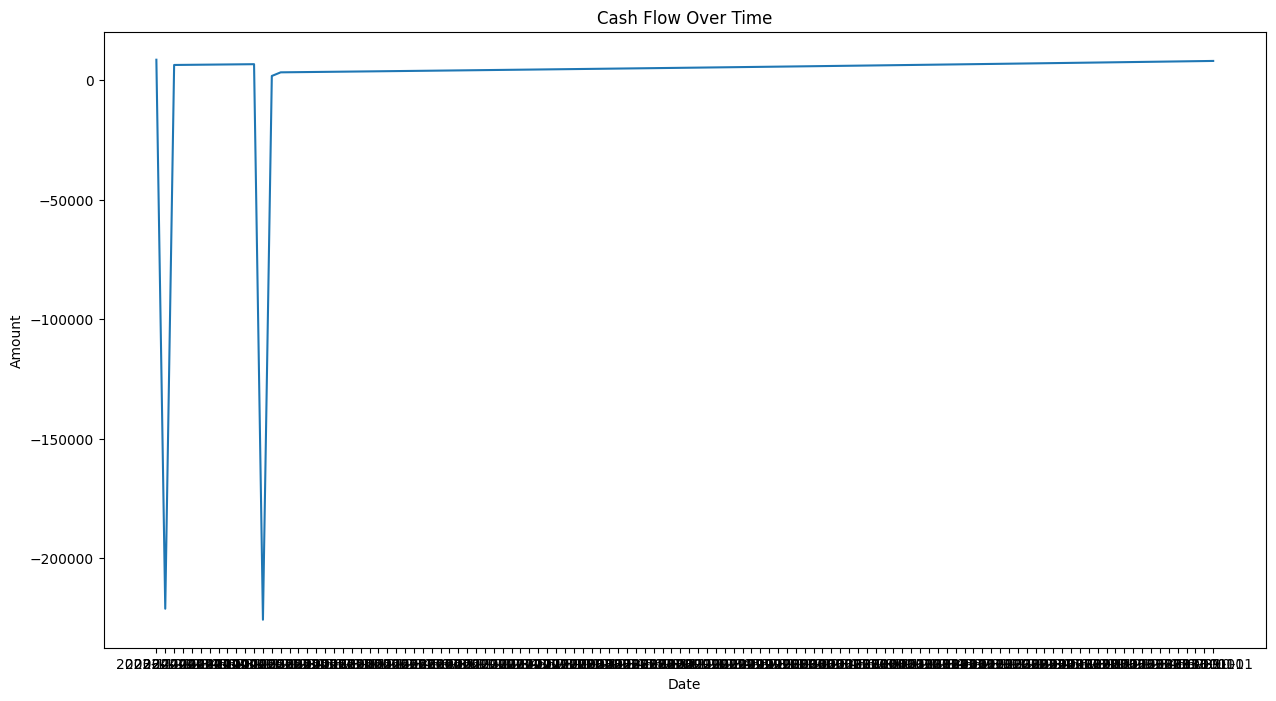

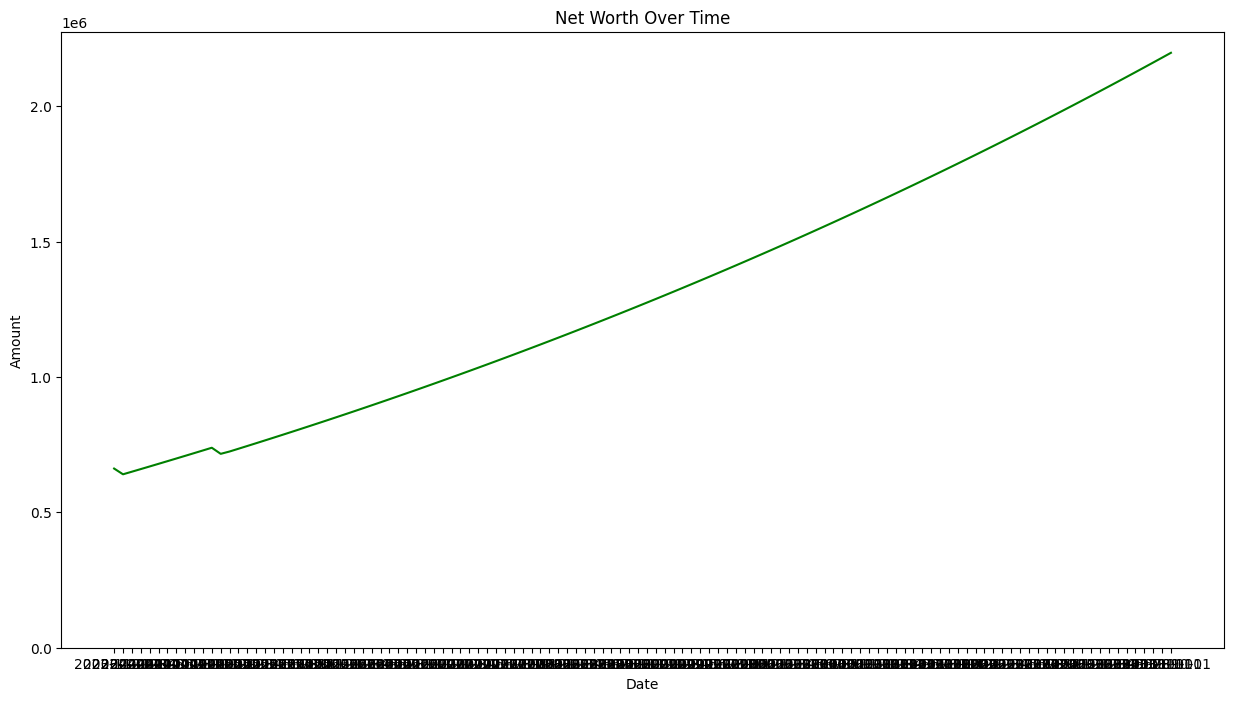

In [8]:
simulation.plot_results()